# Covid 19 Cases and Death
## Data Setup
Our data comes from [Our World in Data](https://ourworldindata.org/coronavirus-source-data). We use two feeds, the population feed and the all-four-metrics feed. 
### Packages
* Covid19 loads, scrubs, and joins the Covid19 case and population data
* DataFrames for representation of tabular data
* Query for support of piped query interface

In [1]:
using Covid19, DataFrames, Query
ENV["COLUMNS"]=120

120

### Data

This is an example data frame that shows the use of our toolset. 

* We start with the data for cases
* Then we choose the columns we want
* Then we filter by the country with the first cases so we'll see data
* Finally we pipe to a dataframe so we'll keep the data that way.

In [2]:
cases = data() |>
        @select(:location, :population, :date, :new_cases, :new_deaths, :total_cases, :total_deaths) |> 
        @filter(_.location == "United States") |>
        DataFrame

 cases |> df -> show(df, allrows=true)


294×7 DataFrame. Omitted printing of 2 columns
│ Row │ location      │ population │ date       │ new_cases │ new_deaths │
│     │ String        │ Int64?     │ Dates.Date │ Float64   │ Float64    │
├─────┼───────────────┼────────────┼────────────┼───────────┼────────────┤
│ 1   │ United States │ 331002647  │ 2019-12-31 │ 0.0       │ 0.0        │
│ 2   │ United States │ 331002647  │ 2020-01-01 │ 0.0       │ 0.0        │
│ 3   │ United States │ 331002647  │ 2020-01-02 │ 0.0       │ 0.0        │
│ 4   │ United States │ 331002647  │ 2020-01-03 │ 0.0       │ 0.0        │
│ 5   │ United States │ 331002647  │ 2020-01-04 │ 0.0       │ 0.0        │
│ 6   │ United States │ 331002647  │ 2020-01-05 │ 0.0       │ 0.0        │
│ 7   │ United States │ 331002647  │ 2020-01-06 │ 0.0       │ 0.0        │
│ 8   │ United States │ 331002647  │ 2020-01-07 │ 0.0       │ 0.0        │
│ 9   │ United States │ 331002647  │ 2020-01-08 │ 0.0       │ 0.0        │
│ 10  │ United States │ 331002647  │ 2020-01-09 │ 0.0

│ 116 │ United States │ 331002647  │ 2020-04-24 │ 26543.0   │ 3179.0     │
│ 117 │ United States │ 331002647  │ 2020-04-25 │ 21352.0   │ 1054.0     │
│ 118 │ United States │ 331002647  │ 2020-04-26 │ 48529.0   │ 2172.0     │
│ 119 │ United States │ 331002647  │ 2020-04-27 │ 26857.0   │ 1687.0     │
│ 120 │ United States │ 331002647  │ 2020-04-28 │ 22541.0   │ 1369.0     │
│ 121 │ United States │ 331002647  │ 2020-04-29 │ 24132.0   │ 2110.0     │
│ 122 │ United States │ 331002647  │ 2020-04-30 │ 27326.0   │ 2611.0     │
│ 123 │ United States │ 331002647  │ 2020-05-01 │ 29917.0   │ 2040.0     │
│ 124 │ United States │ 331002647  │ 2020-05-02 │ 33955.0   │ 2062.0     │
│ 125 │ United States │ 331002647  │ 2020-05-03 │ 29288.0   │ 1317.0     │
│ 126 │ United States │ 331002647  │ 2020-05-04 │ 24972.0   │ 1297.0     │
│ 127 │ United States │ 331002647  │ 2020-05-05 │ 22593.0   │ 1252.0     │
│ 128 │ United States │ 331002647  │ 2020-05-06 │ 23841.0   │ 2144.0     │
│ 129 │ United States │ 3

│ 278 │ United States │ 331002647  │ 2020-10-03 │ 54471.0   │ 908.0      │
│ 279 │ United States │ 331002647  │ 2020-10-04 │ 50659.0   │ 678.0      │
│ 280 │ United States │ 331002647  │ 2020-10-05 │ 34901.0   │ 400.0      │
│ 281 │ United States │ 331002647  │ 2020-10-06 │ 40705.0   │ 398.0      │
│ 282 │ United States │ 331002647  │ 2020-10-07 │ 43062.0   │ 717.0      │
│ 283 │ United States │ 331002647  │ 2020-10-08 │ 48182.0   │ 892.0      │
│ 284 │ United States │ 331002647  │ 2020-10-09 │ 56800.0   │ 972.0      │
│ 285 │ United States │ 331002647  │ 2020-10-10 │ 58082.0   │ 1014.0     │
│ 286 │ United States │ 331002647  │ 2020-10-11 │ 54271.0   │ 590.0      │
│ 287 │ United States │ 331002647  │ 2020-10-12 │ 43597.0   │ 394.0      │
│ 288 │ United States │ 331002647  │ 2020-10-13 │ 41653.0   │ 314.0      │
│ 289 │ United States │ 331002647  │ 2020-10-14 │ 52517.0   │ 817.0      │
│ 290 │ United States │ 331002647  │ 2020-10-15 │ 59386.0   │ 970.0      │
│ 291 │ United States │ 3

## Plotting Data

We will use plots to visualize our data. 

In [5]:
using VegaLite, VegaDatasets

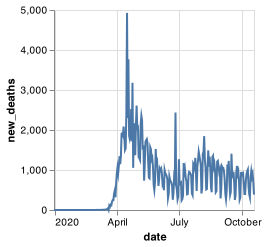

In [7]:
cases |>
@vlplot(
    :line,
    x=:date,
    y=:new_deaths
)

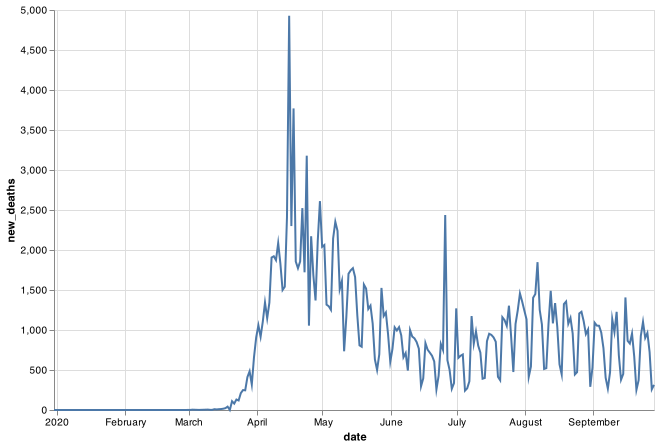

In [71]:
cases |>
@vlplot(
    :line,
    x=:date,
    y=:new_deaths, 
    width=600, 
    height=400
)

In [92]:
hot = ["United States", "India", "Brazil", "France", "Mexico"]

hot_cases = data() |>
        @select(:location, :population, :date, :new_cases, :new_deaths, :total_cases, :total_deaths) |> 
        @filter(_.location in hot) |>
        DataFrame;


## New Cases

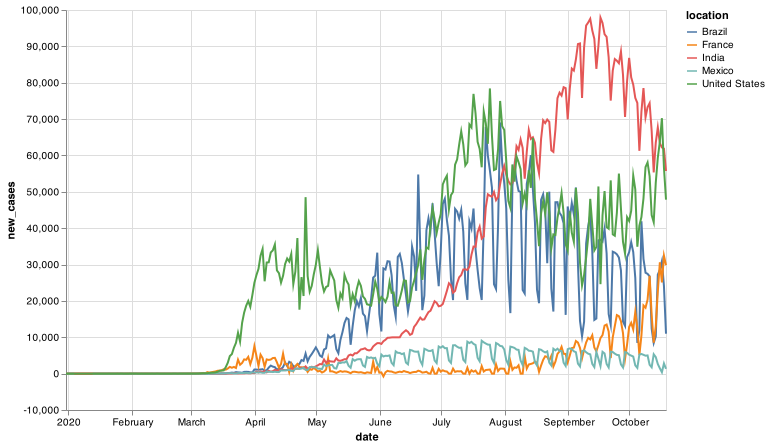

In [96]:
hot_cases |>
@vlplot(
    :line,
    x=:date,
    y=:new_cases, 
    width=600, 
    height=400, 
    color=:location
)



## New Deaths

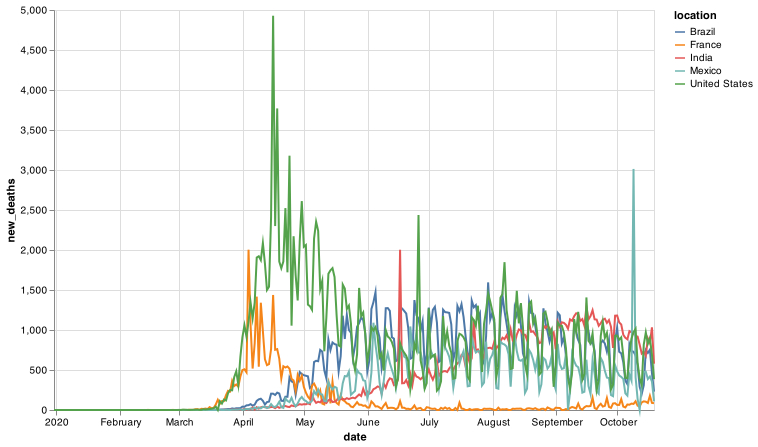

In [118]:
hot_cases |>
@vlplot(
    :line,
    x=:date,
    y=:new_deaths, 
    width=600, 
    height=400, 
    color=:location
)



## Cumulative Cases

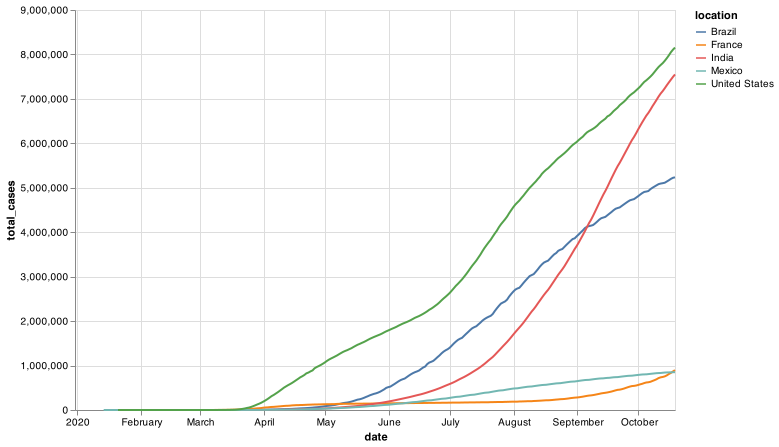

In [98]:
hot_cases |>
@vlplot(
    :line,
    x=:date,
    y=:total_cases, 
    width=600, 
    height=400, 
    color=:location
)



## Cumulative Deaths

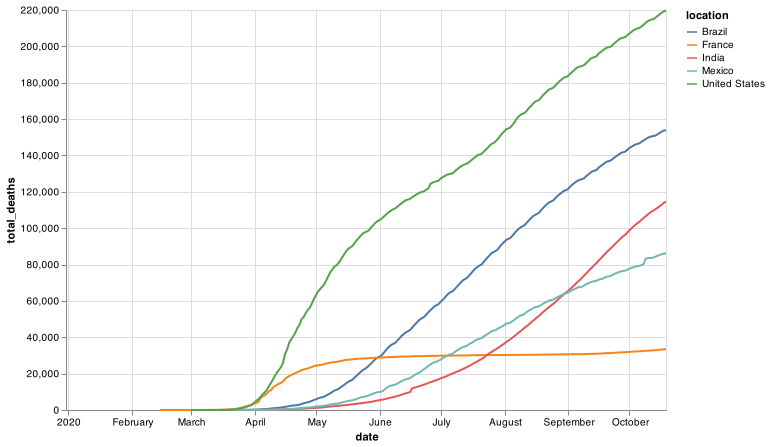

In [99]:
hot_cases |>
@vlplot(
    :line,
    x=:date,
    y=:total_deaths, 
    width=600, 
    height=400, 
    color=:location
)

